In [1]:
# Import external libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

In [2]:
ks_18 = pd.read_csv('../../data/kickstarter/archive/ks-projects-201801.csv')

Let us view the layout of the dataframe.

In [3]:
ks_18.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Display the count of each state for every main_category

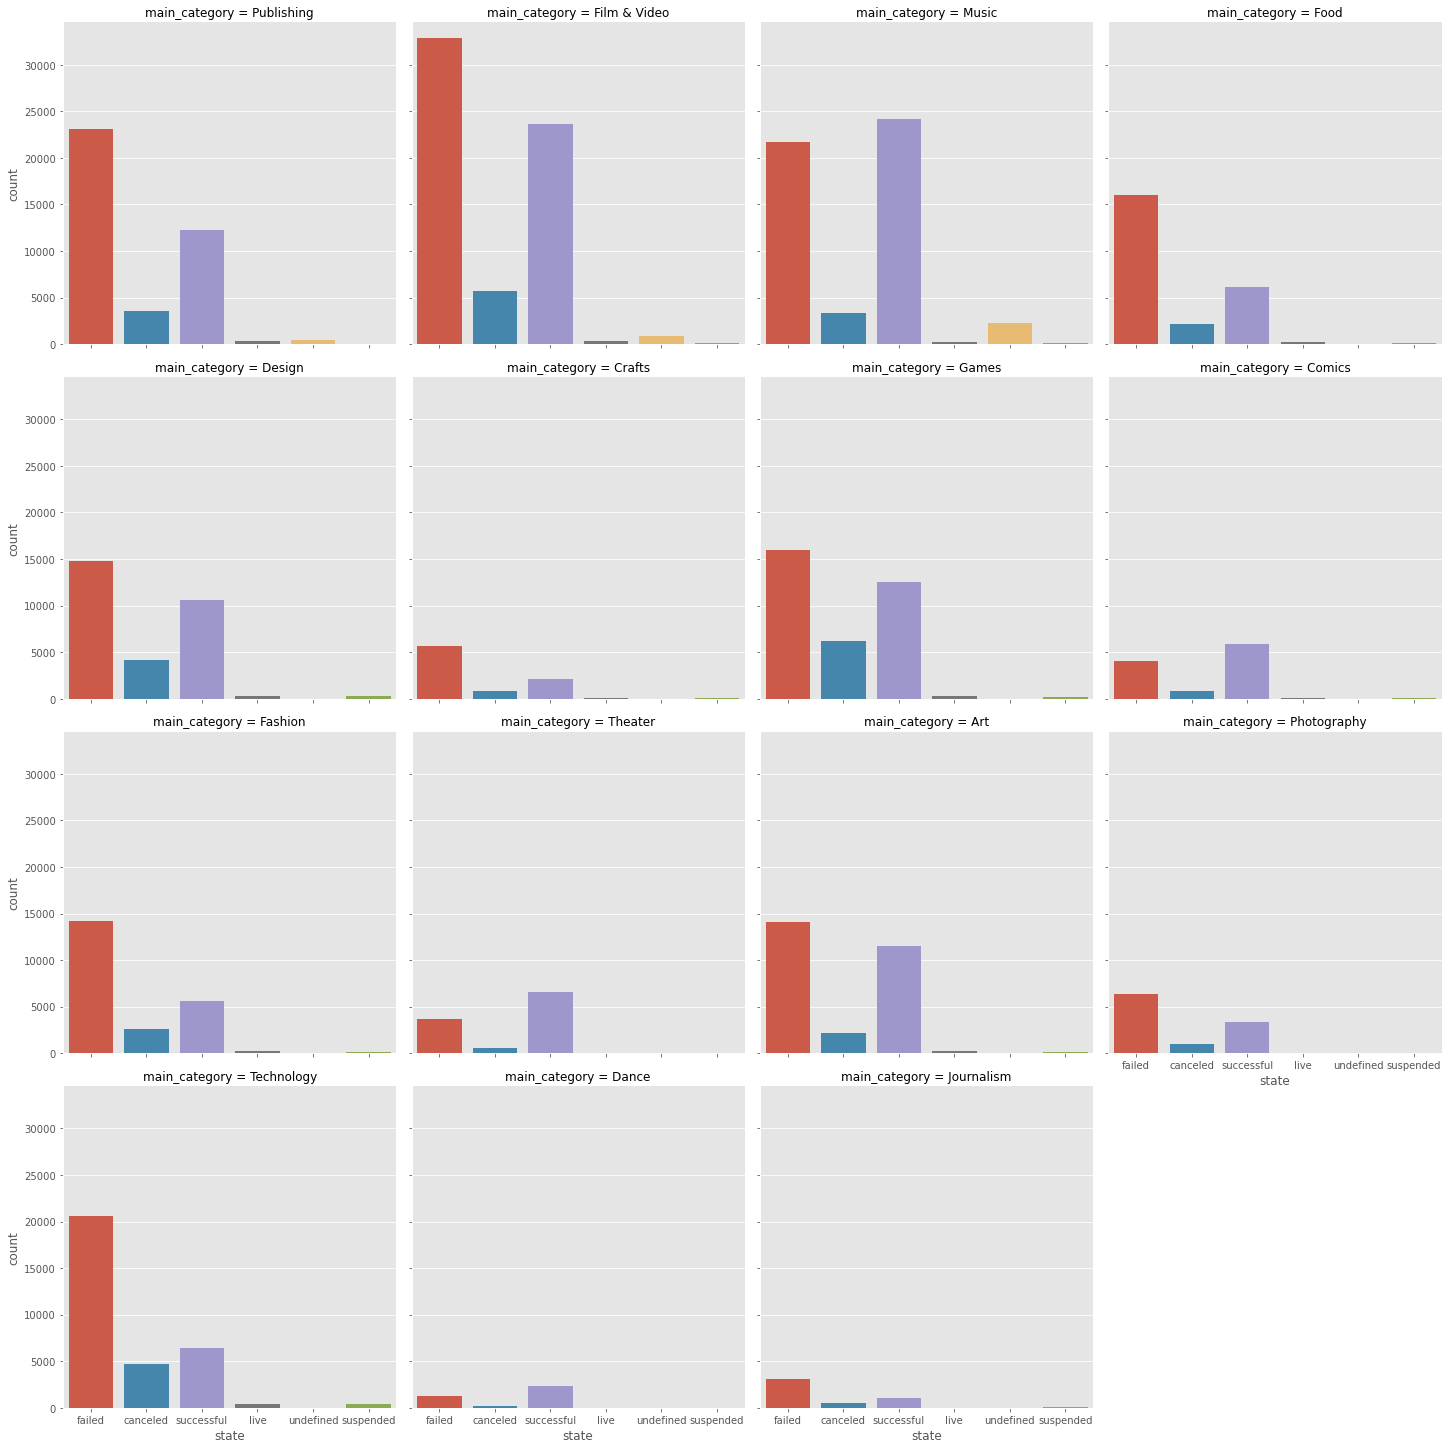

In [4]:
sns.catplot(
    x = 'state', col = 'main_category', col_wrap = 4,
    data = ks_18, kind = 'count'
)

The categories that have more successful campaigns than failed campaigns are music, comics, theater, and dance. Let us explore the usd_real_goal of the categories.

In [5]:
ks_18.groupby('main_category')['usd_goal_real'].describe()

,count,mean,std,min,25%,50%,75%,max
main_category,,,,,,,,
Art,28153.0,39198.575879,1.311762e+06,0.01,1000.0000,3000.00,7500.0000,1.000000e+08
Comics,10819.0,19571.430669,9.712491e+05,0.72,1372.7000,3500.00,8000.0000,1.000000e+08
Crafts,8809.0,10434.466228,1.165589e+05,1.00,713.9300,2345.00,6570.0100,1.000000e+07
Dance,3768.0,9588.328548,5.280850e+04,5.00,1650.6900,3300.00,7000.0000,2.000000e+06
Design,30070.0,41871.388591,8.650831e+05,0.75,4000.0000,10000.00,26716.3025,1.000000e+08
Fashion,22816.0,22412.409361,6.836392e+05,0.77,2000.0000,5938.52,15000.0000,1.000000e+08
Film & Video,63585.0,82625.292254,1.759011e+06,0.15,2500.0000,6597.87,20000.0000,1.513959e+08
Food,24602.0,49039.620804,1.285999e+06,0.88,3800.0000,10000.00,25000.0000,1.663614e+08
Games,35231.0,44923.741408,8.626912e+05,0.75,2500.0000,8000.00,20461.9350,1.000000e+08


In [6]:
ks_18.skew(axis = 0, skipna= True)

ID                   -0.002600
goal                 70.799280
pledged              75.151792
backers              86.763009
usd pledged         105.899920
usd_pledged_real     82.187516
usd_goal_real        78.220848
dtype: float64

The usd columns show a right skew. To account for this in the visualization, large usd_goal_real values will not be shown.

<AxesSubplot:xlabel='usd_goal_real', ylabel='main_category'>

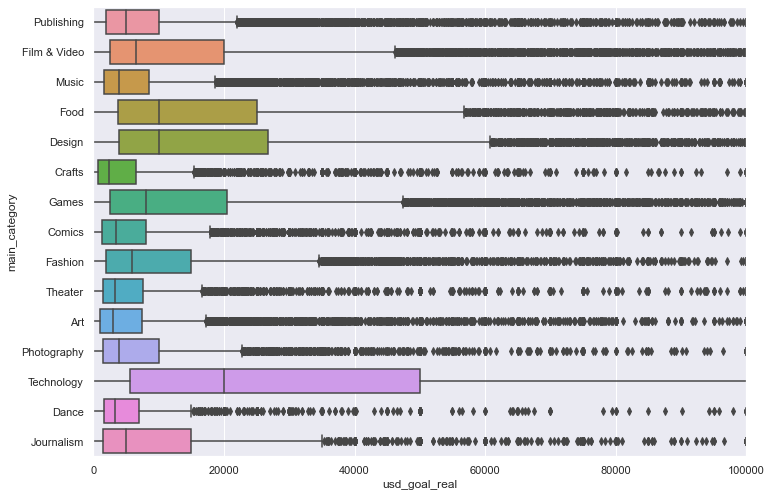

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Sets figure size.
plt.xlim(0,100000) # Limits the greatest x-value. In this case, it is usd_goal_real.

sns.boxplot(
    data = ks_18,
    y = 'main_category', x = 'usd_goal_real'
)

Let us show the values for the upper percentiles in the distribution.

In [8]:
ks_18.groupby('main_category')['usd_goal_real'].describe(percentiles = [.75, .90, .95, .99, .992, .995])

,count,mean,std,min,50%,75%,90%,95%,99%,99.2%,99.5%,max
main_category,,,,,,,,,,,,
Art,28153.0,39198.575879,1.311762e+06,0.01,3000.00,7500.0000,20000.000,38000.000,200000.0000,250000.00000,4.437553e+05,1.000000e+08
Comics,10819.0,19571.430669,9.712491e+05,0.72,3500.00,8000.0000,18000.000,29020.000,70000.0000,80000.00000,1.000000e+05,1.000000e+08
Crafts,8809.0,10434.466228,1.165589e+05,1.00,2345.00,6570.0100,16109.482,30000.000,100000.0000,150000.00000,2.000000e+05,1.000000e+07
Dance,3768.0,9588.328548,5.280850e+04,5.00,3300.00,7000.0000,15000.000,25000.000,94502.9337,100000.00000,1.500000e+05,2.000000e+06
Design,30070.0,41871.388591,8.650831e+05,0.75,10000.00,26716.3025,58000.000,100000.000,279498.6736,343614.22920,5.000000e+05,1.000000e+08
Fashion,22816.0,22412.409361,6.836392e+05,0.77,5938.52,15000.0000,30000.000,50000.000,150000.0000,164457.46680,2.500000e+05,1.000000e+08
Film & Video,63585.0,82625.292254,1.759011e+06,0.15,6597.87,20000.0000,50000.000,100000.000,600000.0000,900000.00000,1.500000e+06,1.513959e+08
Food,24602.0,49039.620804,1.285999e+06,0.88,10000.00,25000.0000,57412.785,100000.000,450000.0000,500000.00000,7.152499e+05,1.663614e+08
Games,35231.0,44923.741408,8.626912e+05,0.75,8000.00,20461.9350,53307.750,100000.000,500000.0000,550000.00000,8.000000e+05,1.000000e+08


Let us view the state of a category by various usd_goal_real ranges. In the cell below, 'Music' in categories_state_group['Music'] can be changed to any value in the main_category column.

In [9]:
main_categories = ks_18['main_category'].unique()
states = ['successful, failed, canceled']

bins = [0, 1000, 2500, 5000, 10000, 20000, 50000, 100000, 500000, 1000000]

categories_state_group = ks_18.groupby(['main_category', 'state'])['usd_goal_real'].value_counts(bins = bins)
categories_state_group['Music']

state       usd_goal_real        
canceled    (5000.0, 10000.0]         651
            (2500.0, 5000.0]          615
            (-0.001, 1000.0]          578
            (1000.0, 2500.0]          489
            (10000.0, 20000.0]        454
            (20000.0, 50000.0]        331
            (50000.0, 100000.0]       120
            (100000.0, 500000.0]       58
            (500000.0, 1000000.0]       4
failed      (2500.0, 5000.0]         5135
            (5000.0, 10000.0]        4226
            (1000.0, 2500.0]         3819
            (-0.001, 1000.0]         3445
            (10000.0, 20000.0]       2616
            (20000.0, 50000.0]       1680
            (50000.0, 100000.0]       482
            (100000.0, 500000.0]      264
            (500000.0, 1000000.0]      46
live        (2500.0, 5000.0]           71
            (5000.0, 10000.0]          66
            (1000.0, 2500.0]           50
            (-0.001, 1000.0]           41
            (10000.0, 20000.0]         23


<AxesSubplot:xlabel='usd_goal_real', ylabel='Count'>

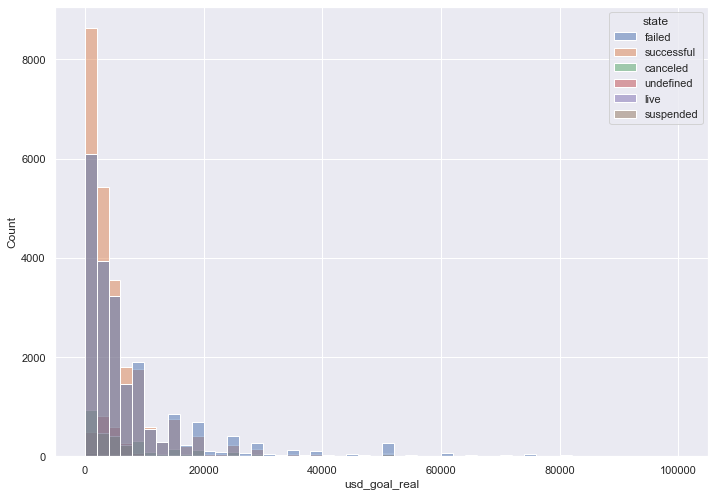

In [10]:
sns.histplot(
    ks_18[(ks_18['usd_goal_real'] < 100000) & (ks_18['main_category'] == 'Music')], 
    bins = 50, x = 'usd_goal_real', hue = 'state'
)

<AxesSubplot:xlabel='usd_goal_real', ylabel='Count'>

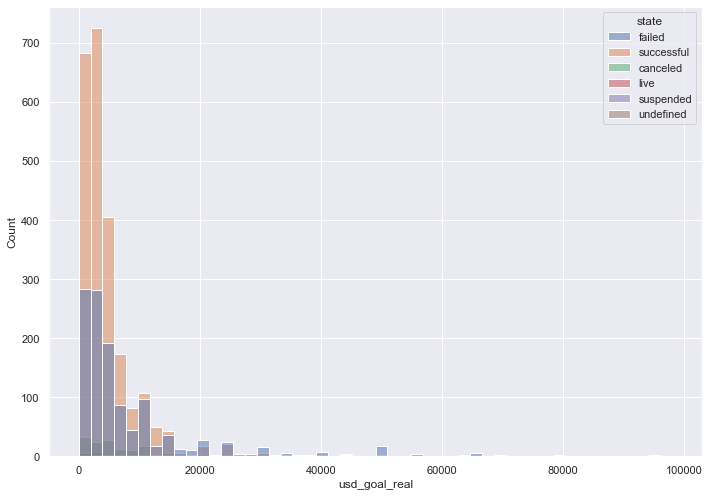

In [11]:
sns.histplot(
    ks_18[(ks_18['usd_goal_real'] < 100000) & (ks_18['main_category'] == 'Dance')], 
    bins = 50, x = 'usd_goal_real', hue = 'state'
)

<AxesSubplot:xlabel='usd_goal_real', ylabel='Count'>

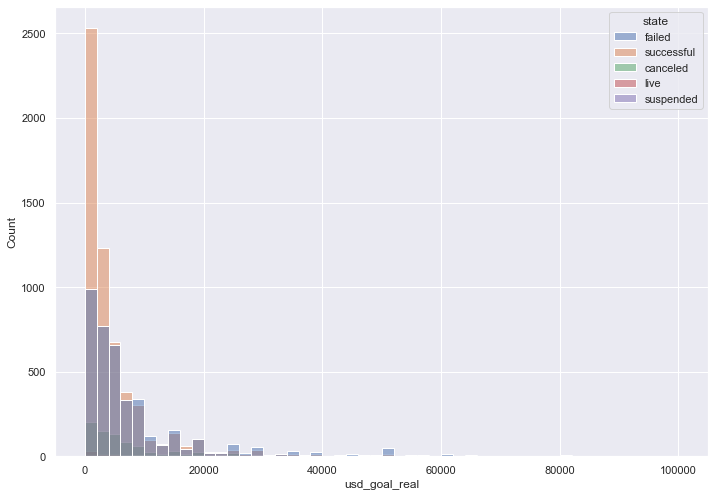

In [12]:
sns.histplot(
    ks_18[(ks_18['usd_goal_real'] < 100000) & (ks_18['main_category'] == 'Comics')], 
    bins = 50, x = 'usd_goal_real', hue = 'state'
)

<AxesSubplot:xlabel='usd_goal_real', ylabel='Count'>

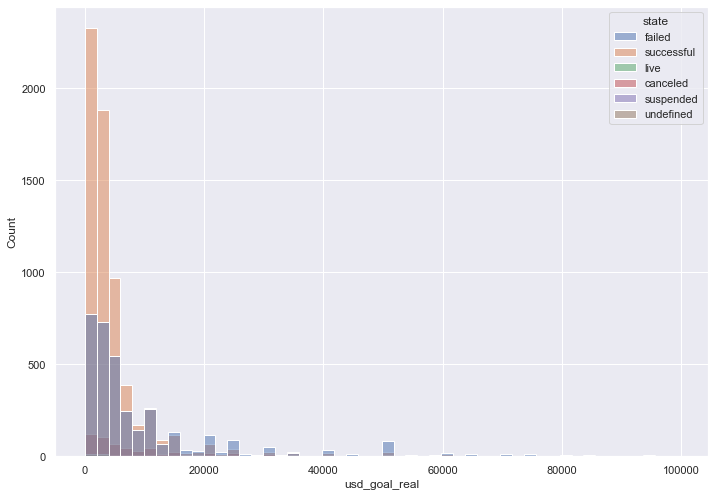

In [13]:
sns.histplot(
    ks_18[(ks_18['usd_goal_real'] < 100000) & (ks_18['main_category'] == 'Theater')], 
    bins = 50, x = 'usd_goal_real', hue = 'state'
)

In the categories that have more successful campaigns than failed campaigns, the majority of the successful campaigns are low cost. The value of $1,000,000 can be changed in the graph to narrow in on a desired price range. An example follows below.

<AxesSubplot:xlabel='usd_goal_real', ylabel='Count'>

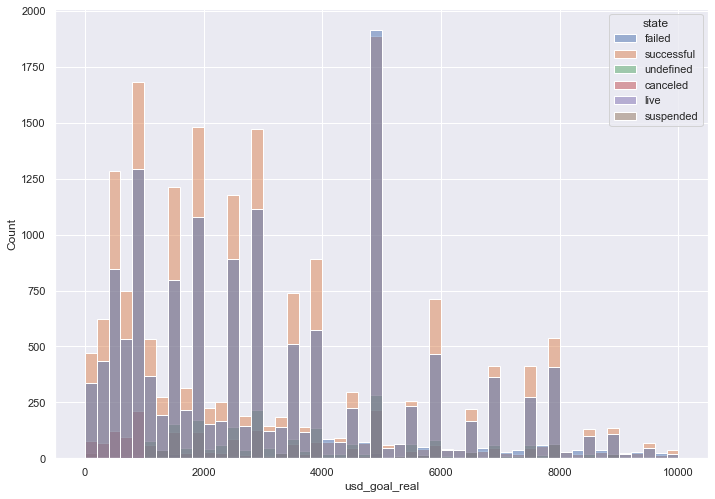

In [14]:
sns.histplot(
    ks_18[(ks_18['usd_goal_real'] < 10000) & (ks_18['main_category'] == 'Music')], 
    bins = 50, x = 'usd_goal_real', hue = 'state'
)

For music, a campaign appears to be more likely to succeed if the usd_goal_real is less than $5,000.

Now, let us explore if the number of backers influences the state of a campaign.

<AxesSubplot:xlabel='backers', ylabel='usd_goal_real'>

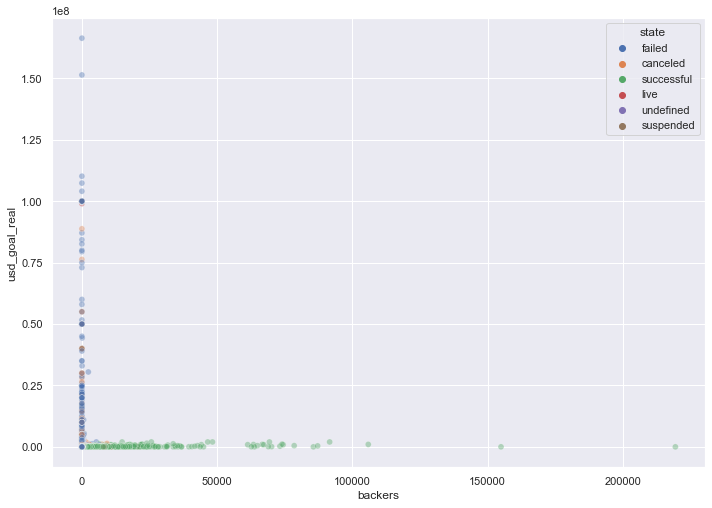

In [15]:
sns.scatterplot(
    data = ks_18, 
    x = 'backers', y = 'usd_goal_real', hue = 'state', alpha = 0.4
)

It appears that campaigns with a high number of backers, and a low usd_goal_real value are more likely to be successful.

<AxesSubplot:xlabel='backers', ylabel='usd_goal_real'>

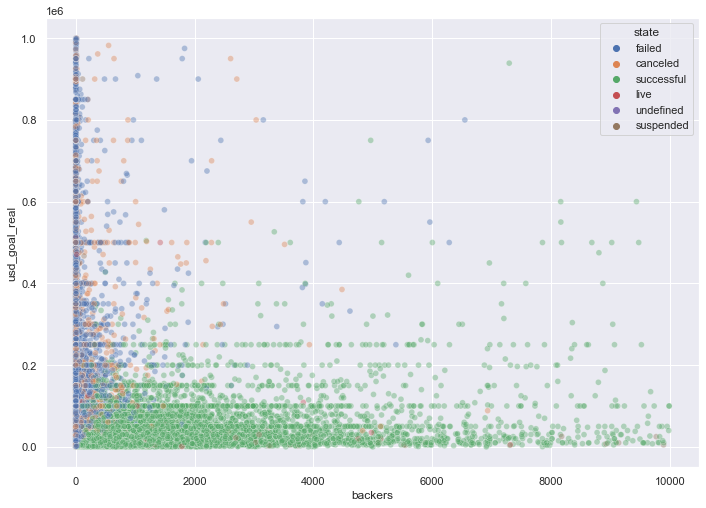

In [16]:
sns.scatterplot(
    data = ks_18[(ks_18['usd_goal_real'] < 1000000) & (ks_18['backers'] < 10000)], 
    x = 'backers', y = 'usd_goal_real', hue = 'state', alpha = 0.4
)

Now, let us explore which main_category has the most successful campaigns in the graph above.

In [17]:
ks_18[
    (ks_18['usd_goal_real'] < 1000000) &
    (ks_18['backers'] < 10000) &
    (ks_18['state'] == 'successful') 
]['main_category'].value_counts()

Music           24193
Film & Video    23610
Games           12405
Publishing      12294
Art             11509
Design          10491
Theater          6534
Technology       6390
Food             6080
Comics           5841
Fashion          5589
Photography      3305
Dance            2338
Crafts           2114
Journalism       1012
Name: main_category, dtype: int64

In [18]:
ks_18[ks_18['main_category'] == 'Music']['category'].value_counts()

Music               15727
Rock                 6758
Indie Rock           5657
Country & Folk       4451
Hip-Hop              3912
Pop                  3350
Classical Music      2613
Electronic Music     2170
World Music          2102
Jazz                 1850
Faith                1092
Metal                 717
R&B                   458
Punk                  317
Kids                  285
Blues                 268
Latin                 137
Chiptune               35
Comedy                 19
Name: category, dtype: int64

Which music category has the most likely to have a successful campaign?

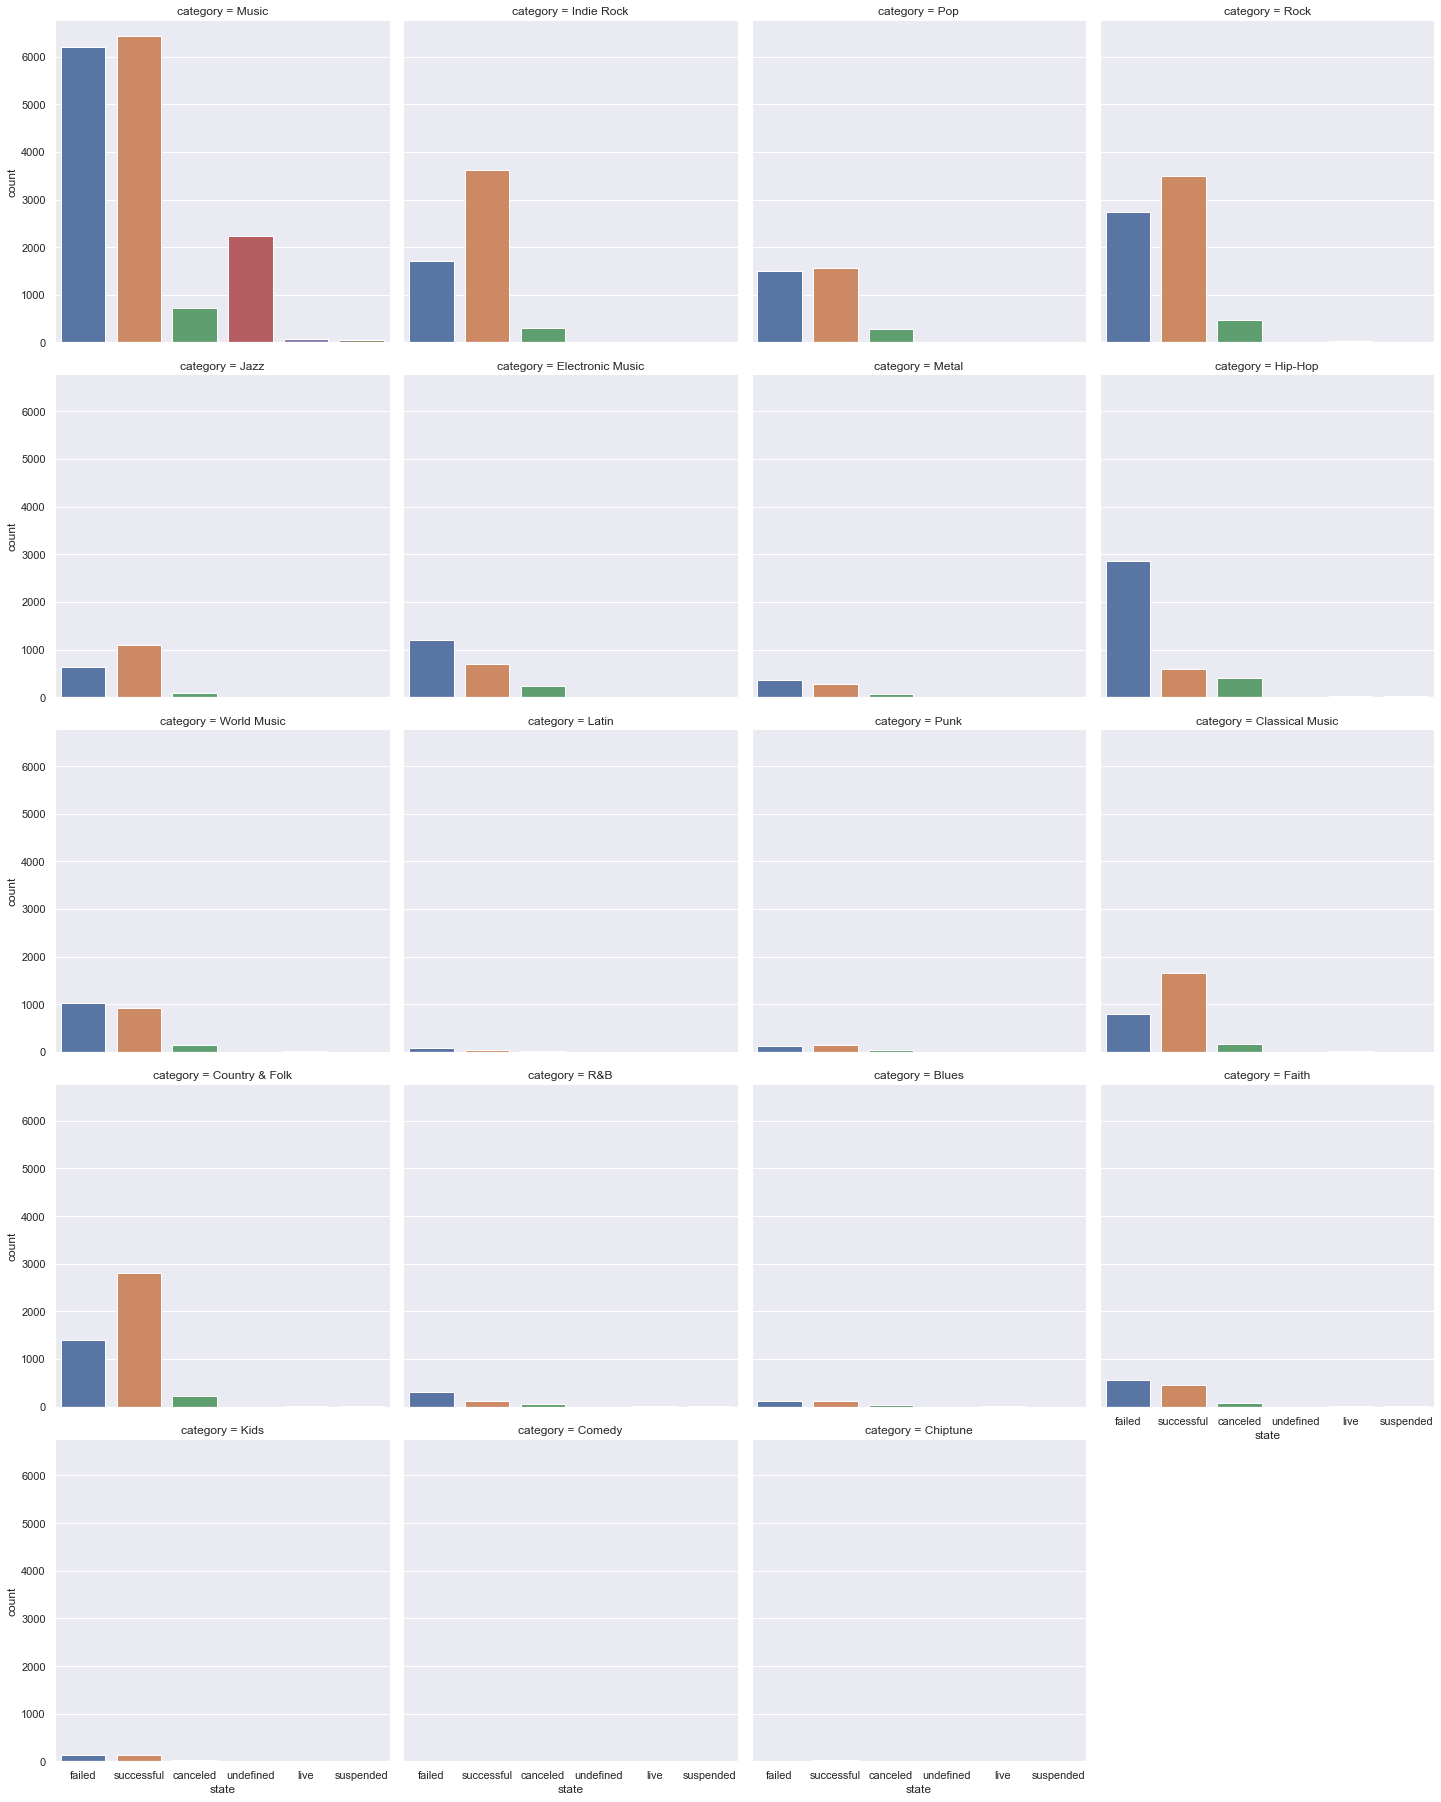

In [19]:
sns.catplot(
    data = ks_18[ks_18['main_category'] == 'Music'],
    x = 'state', col = 'category', col_wrap = 4,
    kind = 'count'
)